In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [15]:
iris = sns.load_dataset('iris')

In [16]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# 연습문제 1 - a
iris.groupby(iris.species).agg(['mean','std'])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

In [18]:
# 연습문제 1 - b
def outliers_iqr(data):
    Q1,Q3 = np.percentile(data, [25,75])
    iqr = Q3 - Q1
    lower_bound = Q1 - (1.5 * iqr)
    upper_bound = Q3 + (1.5 * iqr)
    new_iris = []
    for e in data:
        if (e<lower_bound)|(e>upper_bound):
            e = np.NaN
        new_iris.append(e)
    return new_iris

In [19]:
iris_species = iris.set_index('species')
iris_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [23]:
list_species = ['setosa','versicolor','virginica']
list_features = ['sepal_length','sepal_width','petal_length','petal_width']
for i in list_species:
    for k in list_features:
        iris_species.loc[i][k] = outliers_iqr(iris_species.loc[i][k])

In [24]:
iris_species.pivot_table(list_features,'species')

,petal_length,petal_width,sepal_length,sepal_width
species,,,,
setosa,1.460870,0.233333,5.006000,3.431250
versicolor,4.285714,1.326000,5.936000,2.770000
virginica,5.552000,2.026000,6.622449,2.955319


In [31]:
# 연습문제 2
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [32]:
# 연습문제 2 - a
titanic['category1'] = titanic.apply(lambda r: r.sex if r.age > 20 else 'child', axis = 1)
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [33]:
# 연습문제 2 - b
titanic.age = titanic['age'].fillna(titanic['age'].mean())
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male


In [34]:
# 연습문제 2 - c
titanic.pivot_table('survived',['sex','class','embark_town'])

survived
sex    class  embark_town          
female First  Cherbourg    0.976744
              Queenstown   1.000000
              Southampton  0.958333
       Second Cherbourg    1.000000
              Queenstown   1.000000
              Southampton  0.910448
       Third  Cherbourg    0.652174
              Queenstown   0.727273
              Southampton  0.375000
male   First  Cherbourg    0.404762
              Queenstown   0.000000
              Southampton  0.354430
       Second Cherbourg    0.200000
              Queenstown   0.000000
              Southampton  0.154639
       Third  Cherbourg    0.232558
              Queenstown   0.076923
              Southampton  0.128302

In [118]:
# 성별 생존율
titanic.pivot_table('survived','sex')

,survived
sex,
female,0.742038
male,0.188908


In [117]:
# 선실별 생존율
titanic.pivot_table('survived','class')

,survived
class,
First,0.629630
Second,0.472826
Third,0.242363


In [116]:
# 출발지별 생존율
titanic.pivot_table('survived','embark_town')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


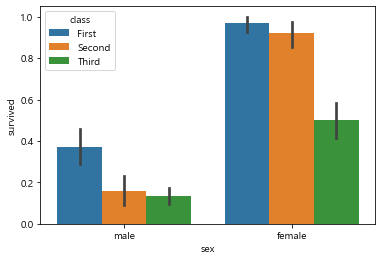

In [38]:
sns.barplot(x = 'sex',y = 'survived',hue='class',data=titanic)
plt.show()

In [40]:
# 연습문제 2 - d
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic['age_cat'] = pd.cut(titanic.age,bins,labels = labels)

In [41]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cat
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,청년
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,중년
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,청년
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,중년
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,중년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,청년
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,미성년자
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,청년
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,청년


In [42]:
# 그룹별 생존율 
titanic.pivot_table('survived','age_cat')

,survived
age_cat,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


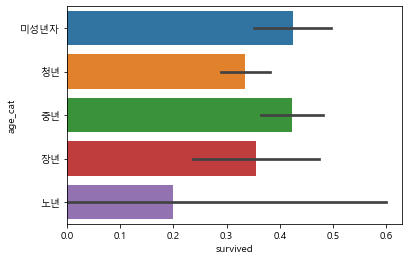

In [45]:
sns.barplot(data=titanic,x = 'survived',y='age_cat')
plt.show()

In [48]:
# 연습문제 2 - e
def q3cut(s):
    return pd.qcut(s, 3, labels=["A1", "A2", "A3"]).astype(str)
titanic['ageGroup'] = titanic.groupby(['sex','survived'])[['age']].transform(q3cut)

In [49]:
titanic[['sex','survived','age','ageGroup']]

,sex,survived,age,ageGroup
0,male,0,22.000000,A1
1,female,1,38.000000,A3
2,female,1,26.000000,A2
3,female,1,35.000000,A3
4,male,0,35.000000,A3
...,...,...,...,...
886,male,0,27.000000,A1
887,female,1,19.000000,A1
888,female,0,29.699118,A2
889,male,1,26.000000,A2


In [50]:
# 나이 그룹별 생존율
titanic.pivot_table('survived','ageGroup')

,survived
ageGroup,
A1,0.397394
A2,0.370000
A3,0.383803


In [51]:
# 나이 그룹별 성비 = 그룹별 남녀 인원수/그룹별 인원수
titanic.groupby(['ageGroup','sex'])[['survived']].count()/titanic.groupby(['ageGroup'])[['survived']].count()

survived
ageGroup sex             
A1       female  0.364821
         male    0.635179
A2       female  0.340000
         male    0.660000
A3       female  0.352113
         male    0.647887

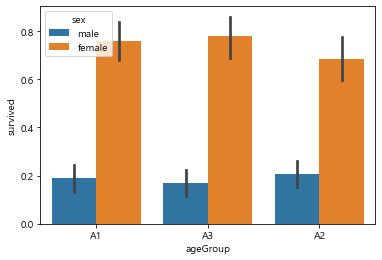

In [54]:
sns.barplot(data=titanic, x='ageGroup',y='survived',hue='sex')
plt.show()

In [343]:
# 연습문제 3
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [344]:
# 연습문제 3 - a
mpg['hp_per_cc'] = mpg['horsepower']/mpg['displacement']

In [345]:
# 연습문제 3 - b
mpg['manufacturer'] = mpg.name.str.split(' ').str[0]

In [346]:
model_list = []
for e in mpg.name.str.split(' ').str[1:].tolist():
    model_list.append(' '.join(e))

In [347]:
mpg['model'] = model_list
del mpg['name']

In [348]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0.423453,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0.471429,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0.471698,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0.493421,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0.463576,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0.614286,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,0.536082,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0.622222,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0.658333,ford,ranger


In [143]:
# 연습문제 3 - c
mpg.groupby(mpg.cylinders)[['mpg']].agg(['mean'])

,mpg
,mean
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [183]:
mpg.pivot_table('mpg','cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [144]:
# 연습문제 3 - d
mpg.groupby(mpg.origin)[['hp_per_cc']].agg(['mean'])

,hp_per_cc
,mean
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [184]:
mpg.pivot_table('hp_per_cc','origin')

,hp_per_cc
origin,
europe,0.740005
japan,0.789485
usa,0.512063


In [145]:
# 연습문제 3 - e
mpgbool = mpg.groupby('manufacturer')['model'].count() >= 5
mpg.groupby('manufacturer')['mpg'].mean()[mpgbool].sort_values(ascending = False)[:5]

manufacturer
vw         39.016667
honda      33.761538
renault    32.880000
datsun     31.113043
mazda      30.860000
Name: mpg, dtype: float64